# 1) Gathering the data of the target city

## Webscrapping all the available business premises in Bari area (Italy), using an Italian property sale website, such as casa.it

### Installation of BeautifulSoup library for webscrapping

In [10]:
!conda install -c conda-forge beautifulsoup4 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    soupsieve-1.9.3            |           py36_0          57 KB  conda-forge
    beautifulsoup4-4.8.0       |           py36_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         201 KB

The following NEW packages will be INSTALLED:

    soupsieve:      1.9.3-py36_0 conda-forge

The following packages will be UPDATED:

    beautifulsoup4: 4.6.3-py37_0             --> 4.8.0-py36_0 conda-forge


soupsieve-1.9.3     

### Importing the firsts library needed

In [11]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json

### Setting the parameters to make the right call

In [14]:
RENT_OR_BUY = 'affitti' #type of search
MQ_MIN = '400' #extension of the place in square meters
BOUNDINBOX_NW = '41.149326, 16.829185'
BOUNDINBOX_SE = '41.077046, 16.910946'
TYPE = 'commerciale' #specifies if the place is for business or for home

url = 'https://www.casa.it/srp/?page=1&tr={}&surrounding=false&mqMin={}&geobounds={{"bbox":[[{}],[{}]],"zoom":15}}&precision=7&propertyTypeGroup={}&q=94a09c31'.format(
RENT_OR_BUY, MQ_MIN, BOUNDINBOX_NW, BOUNDINBOX_SE, TYPE)

### Making the request and parsing with BeautifulSoup

In [15]:
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
json_data = soup.find("script", {"type":"application/ld+json"}).get_text(strip = True)
parsed_json = (json.loads(json_data))

### Gathering the resulting announces, giving a name and getting the coordinates

In [10]:
num = 0;
business_candidates = [];
info_blocks = parsed_json['@graph']
for element in info_blocks:
    if(element['@type'] == 'SingleFamilyResidence'):
        if('geo' in element):
                if(('latitude' in element['geo']) and ('longitude' in element['geo'])):
                    num = num + 1;
                    label = "Candidate " + str(num);
                    business_candidate = {'label' : label, 'lat' : element['geo']['latitude'], 'lng' : element['geo']['longitude']}
                    business_candidates.append(business_candidate)

In [17]:
business_candidates
#displaying the results of the research

[{'label': 'Candidate 1', 'lat': 41.10749, 'lng': 16.858164},
 {'label': 'Candidate 2', 'lat': 41.121638, 'lng': 16.86328},
 {'label': 'Candidate 3', 'lat': 41.126345, 'lng': 16.850346},
 {'label': 'Candidate 4', 'lat': 41.11044, 'lng': 16.87522},
 {'label': 'Candidate 5', 'lat': 41.117143, 'lng': 16.871871},
 {'label': 'Candidate 6', 'lat': 41.125244, 'lng': 16.867739},
 {'label': 'Candidate 7', 'lat': 41.102368, 'lng': 16.883432},
 {'label': 'Candidate 8', 'lat': 41.121354, 'lng': 16.859204},
 {'label': 'Candidate 9', 'lat': 41.124513, 'lng': 16.86066},
 {'label': 'Candidate 10', 'lat': 41.114412, 'lng': 16.852271},
 {'label': 'Candidate 11', 'lat': 41.101465, 'lng': 16.888283},
 {'label': 'Candidate 12', 'lat': 41.100996, 'lng': 16.888981},
 {'label': 'Candidate 13', 'lat': 41.103709, 'lng': 16.813393},
 {'label': 'Candidate 14', 'lat': 41.133528, 'lng': 16.820605}]

In [18]:
df_bari_business_candidates = pd.DataFrame(business_candidates) #making a dataframe

In [38]:
#df_bari_business_candidates.to_csv(path_or_buf = 'csv_final/df_bari_business_candidates.csv', index=False)

## Displaying the current situation on a map provided by OpenStreetMap

### Installation of geopy library to get the position of Bari on the map through its geocoder

In [2]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

### Importing folio to display maps with python

In [1]:
import folium # map rendering library

In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

### Finding the coordinates of Bari

In [4]:
# Use geopy library to get the latitude and longitude values of Bari.
address = 'Bari, Italy'

geolocator = Nominatim(user_agent="bari_explorer")
location_bari = geolocator.geocode(address)
latitude_bari = location_bari.latitude
longitude_bari = location_bari.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(location_bari, latitude_bari, longitude_bari))

The geograpical coordinate of Bari, BA, PUG, Italia are 41.1257843, 16.8620293.


### Instantiating the map

In [5]:
map_bari = folium.Map(location = [latitude_bari, longitude_bari], zoom_start = 13)

### Loding a geojson file to see on the map the principal borough of Bari in terms of boundaries

In [6]:
boroughs_overlay = f'Bari_borough.geojson'

folium.GeoJson(
    boroughs_overlay,
    name = 'geojson'
).add_to(map_bari)

### Loading the marks displaying them on the map

In [19]:
# Add markers to map
for business_candidate in business_candidates:
    lat = business_candidate['lat']
    lng = business_candidate['lng']
    label = business_candidate['label']
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_bari)  

In [20]:
map_bari

### Scrapping the coordinates of the neighbourhoods from wikipedia

In [25]:
#retrieved from https://it.wikipedia.org/wiki/Quartieri_di_Bari#I_municipi

urls = []
urls.append('https://it.wikipedia.org/wiki/Murat_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Bari_Vecchia')
urls.append('https://it.wikipedia.org/wiki/Libert%C3%A0_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Madonnella')
urls.append('https://it.wikipedia.org/wiki/Japigia_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Torre_a_Mare')
urls.append('https://it.wikipedia.org/wiki/San_Giorgio_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Picone_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Poggiofranco')
urls.append('https://it.wikipedia.org/wiki/Carrassi')
urls.append('https://it.wikipedia.org/wiki/San_Pasquale_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Mungivacca')
urls.append('https://it.wikipedia.org/wiki/San_Paolo_(Bari)')
urls.append('https://it.wikipedia.org/wiki/Stanic-Villaggio_del_Lavoratore')
urls.append('https://it.wikipedia.org/wiki/Marconi-San_Girolamo-Fesca')
urls.append('https://it.wikipedia.org/wiki/Carbonara-Santa_Rita')
urls.append('https://it.wikipedia.org/wiki/Ceglie_del_Campo')
urls.append('https://it.wikipedia.org/wiki/Loseto')
urls.append('https://it.wikipedia.org/wiki/Palese-Macchie')
urls.append('https://it.wikipedia.org/wiki/Santo_Spirito-Catino-San_Pio')

### Defining a function for scrapping the wikipedia urls

In [27]:
def getNeighbourhoodData(url):
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser")
    neighbourhood_name = "";
    html_content = soup.text;
    neighbourhood_name = soup.title.text.replace(' - Wikipedia', '')
    
    neighbourhood_coordinates = soup.find("span", {"class": "geo"}).text.split('; ');
    neighbourhood_latitude = neighbourhood_coordinates[0]
    neighbourhood_longitude = neighbourhood_coordinates[1]
    dictionary = {'label': neighbourhood_name, 'lat': neighbourhood_latitude, 'lng' : neighbourhood_longitude}
    return dictionary

In [28]:
neighbourhoods_data = []
for current_url in urls:
    neighbourhoods_data.append(getNeighbourhoodData(current_url))

In [22]:
neighbourhoods_data

[{'label': 'Murat (Bari)', 'lat': '41.1218', 'lng': '16.8696'},
 {'label': 'San Nicola (Bari)', 'lat': '41.12104', 'lng': '16.86759'},
 {'label': 'Libertà (Bari)', 'lat': '41.1213', 'lng': '16.8557'},
 {'label': 'Madonnella', 'lat': '41.1206', 'lng': '16.8788'},
 {'label': 'Japigia (Bari)', 'lat': '41.113', 'lng': '16.8932'},
 {'label': 'Torre a Mare', 'lat': '41.0856', 'lng': '16.9985'},
 {'label': 'San Giorgio (Bari)', 'lat': '41.0959', 'lng': '16.954'},
 {'label': 'Picone (Bari)', 'lat': '41.1073', 'lng': '16.8508'},
 {'label': 'Poggiofranco', 'lat': '41.1035', 'lng': '16.8589'},
 {'label': 'Carrassi', 'lat': '41.1068', 'lng': '16.8711'},
 {'label': 'San Pasquale (Bari)', 'lat': '41.1135', 'lng': '16.8758'},
 {'label': 'Mungivacca', 'lat': '41.0922', 'lng': '16.8889'},
 {'label': 'San Paolo (Bari)', 'lat': '41.1231', 'lng': '16.7938'},
 {'label': 'Stanic-Villaggio del Lavoratore',
  'lat': '41.10581',
  'lng': '16.8224'},
 {'label': 'Marconi-San Girolamo-Fesca', 'lat': '41.1366', 'l

In [55]:
#pd.DataFrame(neighbourhoods_data).to_csv(path_or_buf = 'csv_final/ds_neighbourhoods_data.csv', index=False)

### Updating the map putting the markers of the neighbourhood as small red circles

In [23]:
# add neighbourhood markers to map
for neighbourhood_data in neighbourhoods_data:
    lat = float(neighbourhood_data['lat'])
    lng = float(neighbourhood_data['lng'])
    label = '{}: {}'.format('Name', neighbourhood_data['label'])
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 4,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_bari) 

In [24]:
map_bari

# 2) Finding the venues associated to the business place candidates

## Retrieving the venues around the points using Foursquare

### Setting the API access parameters

In [34]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Setting a function to get the venues

In [36]:
LIMIT = 100 #maximum number of venues found for each interaction
radius = 250 #radius to venues find in [m]
def getNearbyBusinessCandidate(names, latitudes, longitudes, radius = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)  
       
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Candidate name', 
                  'Candidate latitude', 
                  'Candidate longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
bari_venues = getNearbyBusinessCandidate(names = df_bari_business_candidates['label'],
                                         latitudes = df_bari_business_candidates['lat'],
                                   longitudes = df_bari_business_candidates['lng']
                                  )

### Displaying the resulting dataframe

In [41]:
bari_venues

,Candidate name,Candidate latitude,Candidate longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Candidate 1,41.107490,16.858164,Windigo Saloon,41.103153,16.858356,Pub
1,Candidate 1,41.107490,16.858164,Oriente,41.105606,16.859242,Fast Food Restaurant
2,Candidate 1,41.107490,16.858164,Ekoinè Ri-pub,41.107765,16.863886,Pub
3,Candidate 1,41.107490,16.858164,Demetra,41.109601,16.863231,Cocktail Bar
4,Candidate 1,41.107490,16.858164,Bar Moderno,41.103662,16.859627,Bar
...,...,...,...,...,...,...,...
233,Candidate 12,41.100996,16.888981,Palacarrassi,41.098727,16.884745,Martial Arts Dojo
234,Candidate 13,41.103709,16.813393,Ducati Bari,41.103407,16.813097,Motorcycle Shop
235,Candidate 13,41.103709,16.813393,Iperceramica,41.100828,16.811389,Furniture / Home Store
236,Candidate 14,41.133528,16.820605,Compulab,41.132893,16.823120,Electronics Store


In [42]:
print('There are {} uniques categories.'.format(len(bari_venues['Venue Category'].unique())))

There are 60 uniques categories.


# 3) Preparing the venues in Bari data for elaboration

## One-hot-encoding to map categories in a boolean 1/0 restriction

### Definining a function returning "one hotted" dataframe

In [92]:
def oneHotEncoding(dataframe, index_name):
    # one hot encoding
    dataframe_onehot = pd.get_dummies(dataframe[['Venue Category']], prefix="", prefix_sep = "")

    # add neighborhood column back to dataframe
    dataframe_onehot[index_name] = dataframe[index_name] 

    # move neighborhood column to the first column
    fixed_columns = [dataframe_onehot.columns[-1]] + list(dataframe_onehot.columns[:-1])
    return dataframe_onehot[fixed_columns]

In [44]:
bari_onehot = oneHotEncoding(bari_venues, 'Candidate name')

### Displaying the resulting dataframe

In [82]:
#bari_onehot.to_csv(path_or_buf = 'csv_final/ds_bari_onhot.csv', index=False)
bari_onehot

,Candidate name,Art Museum,Arts & Entertainment,Bakery,Bar,Beach,Bike Rental / Bike Share,Bookstore,Boutique,Breakfast Spot,...,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Steakhouse,Sushi Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant
0,Candidate 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Candidate 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Candidate 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Candidate 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Candidate 1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Candidate 12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,Candidate 13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,Candidate 13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,Candidate 14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grouping the Candindates summing the number of venues for each category

In [47]:
bari_grouped = bari_onehot.groupby('Candidate name').sum().reset_index() #using sum gives us the idea of how many 
                                                                        #venues are there in the radius
bari_grouped

,Candidate name,Art Museum,Arts & Entertainment,Bakery,Bar,Beach,Bike Rental / Bike Share,Bookstore,Boutique,Breakfast Spot,...,Sandwich Place,Seafood Restaurant,Shopping Mall,Snack Place,Steakhouse,Sushi Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant
0,Candidate 1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Candidate 10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,Candidate 11,0,0,0,2,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,Candidate 12,0,0,0,2,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
4,Candidate 13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Candidate 14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Candidate 2,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
7,Candidate 3,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Candidate 4,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,Candidate 5,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2


In [28]:
#bari_grouped.to_csv(path_or_buf = 'csv_final/ds_bari_grouped.csv', index=False)
#bari_grouped = pd.read_csv('csv_final/ds_bari_grouped.csv')

# 4) Getting the venues from other Italian cities

## Scrapping from wikipedia the list of the Italian cities (population > 50000), with the population data

In [53]:
req = requests.get("https://en.wikipedia.org/wiki/List_of_cities_in_Italy#Cities")
soup = BeautifulSoup(req.text, "html.parser")
table_content = soup.find(class_ = "wikitable")
table_rows = table_content.find_all('tr')

columns_headers = []
res = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
        
    # gettin the column headers drom the html table
    tables_th = tr.find_all('th')
    if tables_th:
        for th in tables_th:
            columns_headers.append(th.text.strip());

# creation of the pandas dataframe
df_municipalities = pd.DataFrame(res, columns=columns_headers)

# dropping unwanted headers
df_municipalities = df_municipalities.drop(columns=['Rank', '2011 Census', 'Change', 'Region'])

# renaming the field related to population
df_municipalities.rename(columns = {'2017 Estimate':'Pop_2017_est'}, inplace = True)

# number formatting
df_municipalities['Pop_2017_est'] = df_municipalities['Pop_2017_est'].str.replace(',','')
df_municipalities['Pop_2017_est'] = pd.to_numeric(df_municipalities['Pop_2017_est'])

## Getting the data only relative to city inside some population boundaries
#### This must be done both for the limit of calls providable by Foursquare and because the model should take in account the different habits and behavior of citizen living in a medium range Italian city as Bari is (~350k inhabitants).

In [54]:
POP_BOUNDARY_LOWER = 180000
POP_BOUNDARY_UPPER = 420000

In [55]:
df_municipalities = df_municipalities[(df_municipalities['Pop_2017_est'] > POP_BOUNDARY_LOWER) & (df_municipalities['Pop_2017_est'] < POP_BOUNDARY_UPPER)]
df_municipalities

,City,Pop_2017_est
6,Bologna,389261
7,Florence,380948
8,Bari,323370
9,Catania,311620
10,Venice,261321
11,Verona,257275
12,Messina,234293
13,Padua,210440
14,Trieste,204338
15,Taranto,198283


## Retrieving the gyms in the cities using Foursquare

### Using the "gym" category id retrieved from https://developer.foursquare.com/docs/resources/categories

In [57]:
CATEGORY = '4bf58dd8d48988d175941735'

### Use of the parameter "near" in order to not be limited to a radius and than getting only the gyms with the selected municipality, this results in the exclusion of the rows with gyms not strictly being part of the municipality.

In [58]:
gyms_list = []
for NEAR in (df_municipalities['City']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&categoryId={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        NEAR, 
        CATEGORY,
        LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']
    for result in results:
        if('city' in result['venue']['location']):
            if(result['venue']['location']['city'] == NEAR):
                gyms_list.append(
                    [(
                result['venue']['location']['city'],
                result['venue']['id'], 
                result['venue']['name'], 
                result['venue']['location']['lat'], 
                result['venue']['location']['lng']
                        )])

df_gym = pd.DataFrame([item for gym_list in gyms_list for item in gym_list])
df_gym.columns = [
    'Municipality', 
    'Id',  
    'Gym', 
    'Gym Latitude', 
    'Gym Longitude', ]

In [59]:
df_gym

,Municipality,Id,Gym,Gym Latitude,Gym Longitude
0,Bologna,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128
1,Bologna,4c5abcc667ac0f47955b074c,Fashion & Fitness,44.514837,11.398441
2,Bologna,4c0802a3009a0f47906ce5bf,Palestra Body Planet,44.471140,11.376778
3,Bologna,4ca108138afca093ead81716,Villaggio Del Fanciullo,44.494955,11.369462
4,Bologna,4bdea142921d95214ffa6832,Virgin Active Bologna Città,44.511772,11.352281
...,...,...,...,...,...
207,Modena,4da4802463b5a35d51d0271a,Pista di Atletica La Fratellanza,44.653110,10.904620
208,Reggio Calabria,4e64f1702271573ad8ad8ad9,Palestra Parco Caserta,38.114739,15.657191
209,Reggio Calabria,4f92b688e4b04c3ff9412c50,FitLAND,38.117972,15.651431
210,Reggio Calabria,4ebe19f2e5fae16463b494b2,Colosseum Center,38.089534,15.654447


In [64]:
#df_gym.to_csv(path_or_buf='csv_final/df_gym_norating.csv', index = False)

## Getting the ratings for each gym
### Setting 'Suitable' = Yes for gyms with rating > THRESHOLD, otherwise No; gyms without ratings are discarded

In [65]:
RATING_THRESHOLD = 7.0

In [66]:
for index, ID_GYM in enumerate(df_gym['Id'], start = 0):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            ID_GYM,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()['response']
    if 'venue' in results:
        if 'rating' in results['venue']:
            rating = results['venue']['rating']
            df_gym.loc[index, 'Rating'] = rating
            if(rating > RATING_THRESHOLD):
                df_gym.loc[index, 'Suitable'] = 'Yes'
            else:
                df_gym.loc[index, 'Suitable'] = 'No'

In [67]:
df_gym

,Municipality,Id,Gym,Gym Latitude,Gym Longitude,Rating,Suitable
0,Bologna,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,8.0,Yes
1,Bologna,4c5abcc667ac0f47955b074c,Fashion & Fitness,44.514837,11.398441,7.7,Yes
2,Bologna,4c0802a3009a0f47906ce5bf,Palestra Body Planet,44.471140,11.376778,7.7,Yes
3,Bologna,4ca108138afca093ead81716,Villaggio Del Fanciullo,44.494955,11.369462,7.5,Yes
4,Bologna,4bdea142921d95214ffa6832,Virgin Active Bologna Città,44.511772,11.352281,7.2,Yes
...,...,...,...,...,...,...,...
207,Modena,4da4802463b5a35d51d0271a,Pista di Atletica La Fratellanza,44.653110,10.904620,6.3,No
208,Reggio Calabria,4e64f1702271573ad8ad8ad9,Palestra Parco Caserta,38.114739,15.657191,NaN,NaN
209,Reggio Calabria,4f92b688e4b04c3ff9412c50,FitLAND,38.117972,15.651431,NaN,NaN
210,Reggio Calabria,4ebe19f2e5fae16463b494b2,Colosseum Center,38.089534,15.654447,NaN,NaN


In [68]:
# Dropping the rows without a rating
df_gym.dropna(subset = ['Rating'], inplace=True)

In [70]:
df_gym

,Municipality,Id,Gym,Gym Latitude,Gym Longitude,Rating,Suitable
0,Bologna,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,8.0,Yes
1,Bologna,4c5abcc667ac0f47955b074c,Fashion & Fitness,44.514837,11.398441,7.7,Yes
2,Bologna,4c0802a3009a0f47906ce5bf,Palestra Body Planet,44.471140,11.376778,7.7,Yes
3,Bologna,4ca108138afca093ead81716,Villaggio Del Fanciullo,44.494955,11.369462,7.5,Yes
4,Bologna,4bdea142921d95214ffa6832,Virgin Active Bologna Città,44.511772,11.352281,7.2,Yes
...,...,...,...,...,...,...,...
192,Modena,4c56bf4bd12a20a1e20d65bd,Piscina Pergolesi,44.645163,10.949391,7.3,Yes
193,Modena,4cb5f8b164998cfa5deb11a2,Polivalente 87 & Gino Pini,44.617951,10.923886,5.4,No
201,Modena,4ce805f40f196dcbad7942ae,Polisportiva A.Corassori,44.645107,10.895301,7.3,Yes
202,Modena,4e43ce70887703085fd7e9de,Piscina CDR Città dei ragazzi,44.637901,10.916849,5.7,No


In [71]:
#df_gym.to_csv(path_or_buf='csv_final/df_gym_ratings.csv', index=False)

### Let's see graphically how many Sustainable gyms are in the dataset

In [25]:
import matplotlib.pyplot as plt
import math

from matplotlib.ticker import MaxNLocator # Allows only integers on Y axis

#### Creating a function to display barcharts

In [26]:
def barchartSustainable(dataset):
    dataset_stats = dataset.groupby('Suitable').size().to_frame('Number')
    fig = plt.figure(figsize = (4, 5))
    ax = fig.add_subplot(111)
    ax.set_ylim(0, (int(math.ceil(dataset_stats['Number'].max() / 10.0)) * 10))
    ax.bar(dataset_stats.index, dataset_stats['Number'], width = 0.4)
    ax.get_children()[0].set_color('r') 
    ax.get_children()[1].set_color('g') 
    ax.set_xlabel('Suitability of gyms in the dataset')
    ax.set_ylabel('Count')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.155, p.get_height() + 0.3))
    plt.show()

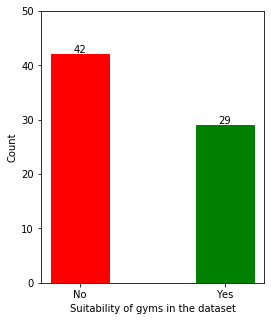

In [81]:
barchartSustainable(df_gym)

## Retrieving the venues around the gyms using Foursquare

#### Making a function to retrieve venues via API call

In [83]:
LIMIT = 100 # Maximum venuses around each gym
radius = 250 # Radius to search in [m]
def getNearbyExistentGym(ids, names, latitudes, longitudes, radius  = 500):
    
    venues_list=[]
    for idgym, name, lat, lng in zip(ids, names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            idgym,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Gym Id',
                             'Gym name', 
                  'Gym latitude', 
                  'Gym longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
gym_venuses = getNearbyExistentGym(ids = df_gym['Id'],
                                   names = df_gym['Gym'],
                                   latitudes= df_gym['Gym Latitude'],
                                   longitudes= df_gym['Gym Longitude']
                                  )

In [86]:
gym_venuses

,Gym Id,Gym name,Gym latitude,Gym longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,La Prosciutteria Firenze,44.496025,11.345934,Trattoria/Osteria
1,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,Camera a Sud,44.496400,11.347093,Wine Bar
2,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,Gelateria delle Moline,44.498420,11.346870,Dessert Shop
3,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,Trattoria La Montanara,44.498868,11.345626,Italian Restaurant
4,4be2ce0db02ec9b6b1b44dc0,Prime,44.496937,11.345128,Antica Gelateria Artigianale Pellegrino,44.495771,11.345816,Ice Cream Shop
...,...,...,...,...,...,...,...,...
1660,4da4802463b5a35d51d0271a,Pista di Atletica La Fratellanza,44.653110,10.904620,Pista di Atletica La Fratellanza,44.653110,10.904620,Track
1661,4da4802463b5a35d51d0271a,Pista di Atletica La Fratellanza,44.653110,10.904620,McDonald's,44.654495,10.906277,Fast Food Restaurant
1662,4da4802463b5a35d51d0271a,Pista di Atletica La Fratellanza,44.653110,10.904620,Piadinaro I Ferraresi,44.654180,10.906752,Sandwich Place
1663,4da4802463b5a35d51d0271a,Pista di Atletica La Fratellanza,44.653110,10.904620,Sottosopra Bowling,44.656555,10.900827,Bowling Alley


In [87]:
print('There are {} uniques categories.'.format(len(gym_venuses['Venue Category'].unique())))

There are 211 uniques categories.


In [88]:
#gym_venuses.to_csv(path_or_buf='csv_final/ds_gym_venuses.csv', index=False)

## One-hot-encoding to map categories in a boolean 1/0 restriction

In [93]:
gym_onehot = oneHotEncoding(gym_venuses, 'Gym Id')

In [94]:
gym_onehot

,Gym Id,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Video Store,Volleyball Court,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,4be2ce0db02ec9b6b1b44dc0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4be2ce0db02ec9b6b1b44dc0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4be2ce0db02ec9b6b1b44dc0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4be2ce0db02ec9b6b1b44dc0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4be2ce0db02ec9b6b1b44dc0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,4da4802463b5a35d51d0271a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1661,4da4802463b5a35d51d0271a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1662,4da4802463b5a35d51d0271a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1663,4da4802463b5a35d51d0271a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#gym_onehot.to_csv(path_or_buf='csv_final/ds_gym_onehot.csv', index = False)

In [138]:
gym_grouped = gym_onehot.groupby('Gym Id').mean().reset_index()
gym_grouped

,Gym Id,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Video Store,Volleyball Court,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,4bb129e5f964a520c37f3ce3,0.0,0.0,0.153846,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.153846,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
1,4bc4985e920eb71324f11e2c,0.0,0.0,0.000000,0.0,0.011765,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.035294,0.0,0.0,0.00,0.0,0.0
2,4bc5d3964a9aa593f9f6067b,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
3,4bce42e3cc8cd13a451ec4cf,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.04,0.0,0.0
4,4bdb0e2a3904a5930083489e,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,526411d311d2eea38bd39520,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
67,52e1820c498e3733012ab16b,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.00,0.0,0.0
68,531ae37e498e3035a4031910,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
69,54062d9e498ed1980149651f,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0


## Binding the column "Suitable" to the gym_grouped table

In [139]:
gym_grouped_ratings = pd.concat([gym_grouped.set_index('Gym Id'),df_gym.set_index('Id')], axis=1, join='inner').reset_index()

### Taking a look to the columns and deleting the unnecessary ones

In [140]:
print('Shape: {} of which columns: {}'.format(gym_grouped_ratings.shape, gym_grouped_ratings.columns))

Shape: (71, 218) of which columns: Index(['index', 'Accessories Store', 'African Restaurant',
       'American Restaurant', 'Arcade', 'Argentinian Restaurant',
       'Art Gallery', 'Art Museum', 'Arts & Crafts Store',
       'Arts & Entertainment',
       ...
       'Winery', 'Wings Joint', 'Women's Store', 'Yoga Studio', 'Municipality',
       'Gym', 'Gym Latitude', 'Gym Longitude', 'Rating', 'Suitable'],
      dtype='object', length=218)


In [141]:
gym_grouped_ratings.drop(columns=['Municipality', 'Gym', 'Gym Latitude', 'Gym Longitude', 'Rating'], inplace = True)

In [142]:
print('Shape: {} of which columns: {}'.format(gym_grouped_ratings.shape, gym_grouped_ratings.columns))

Shape: (71, 212) of which columns: Index(['index', 'Accessories Store', 'African Restaurant',
       'American Restaurant', 'Arcade', 'Argentinian Restaurant',
       'Art Gallery', 'Art Museum', 'Arts & Crafts Store',
       'Arts & Entertainment',
       ...
       'Volleyball Court', 'Warehouse Store', 'Weight Loss Center', 'Wine Bar',
       'Wine Shop', 'Winery', 'Wings Joint', 'Women's Store', 'Yoga Studio',
       'Suitable'],
      dtype='object', length=212)


In [104]:
#gym_grouped_ratings.to_csv(path_or_buf='csv_final/ds_gym_grouped_ratings.csv', index = False)

# 5) Data preparation

## Cleaning the gyms dataset

#### In order to make the model working on the Bari dataset, it's unavoidable to select only the features (the venues) in common between the other-cities gyms dataset and Bari-possible-business-permises dataset

In [161]:
X_Bari = bari_grouped.drop(columns = {'Candidate name'})
X_Gyms = gym_grouped_ratings.drop(columns = {'Suitable'})

In [162]:
common_columns = X_Bari.columns.intersection(X_Gyms.columns)
print(common_columns)

Index(['Art Museum', 'Arts & Entertainment', 'Bakery', 'Bar', 'Beach',
       'Bike Rental / Bike Share', 'Bookstore', 'Boutique', 'Breakfast Spot',
       'Brewery', 'Café', 'Chinese Restaurant', 'Clothing Store',
       'Cocktail Bar', 'Coffee Shop', 'Cosmetics Shop', 'Cupcake Shop',
       'Dessert Shop', 'Diner', 'Dive Bar', 'Electronics Store',
       'Fast Food Restaurant', 'Food', 'Furniture / Home Store', 'Gastropub',
       'Gluten-free Restaurant', 'Gym / Fitness Center', 'Hostel', 'Hotel',
       'Ice Cream Shop', 'Italian Restaurant', 'Japanese Restaurant',
       'Jewelry Store', 'Martial Arts Dojo', 'Mediterranean Restaurant',
       'Mobile Phone Shop', 'Modern European Restaurant', 'Movie Theater',
       'Noodle House', 'Outdoors & Recreation', 'Pier', 'Pizza Place', 'Plaza',
       'Pool', 'Pub', 'Puglia Restaurant', 'Restaurant', 'Sandwich Place',
       'Seafood Restaurant', 'Shopping Mall', 'Snack Place', 'Steakhouse',
       'Sushi Restaurant', 'Theater', 'Toy / G

### Refactoring both the datasets with only the columns in common

In [163]:
X_Bari_refactored = X_Bari.loc[:, common_columns]
X_Gyms_refactored = X_Gyms.loc[:, common_columns]

### Verifyng the success of the operation by looking at the shape of both

In [114]:
print('Shape for Bari: {}. Shape other cities gyms: {}'.format(X_Bari_refactored.shape, X_Gyms_refactored.shape))

Shape for Bari: (14, 57). Shape other cities gyms: (71, 57)


In [15]:
#X_Bari_refactored.to_csv(path_or_buf='csv_final/ds_X_Bari_refactored.csv', index = False, header = True)
#X_Gyms_refactored.to_csv(path_or_buf='csv_final/ds_X_Gyms_refactored.csv', index = False, header = True)
X_Bari_refactored = pd.read_csv('csv_final/ds_X_Bari_refactored.csv')
X_Gyms_refactored = pd.read_csv('csv_final/ds_X_Gyms_refactored.csv')
gym_grouped_ratings = pd.read_csv('csv_final/ds_gym_grouped_ratings.csv')

# 6) Modelling

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Getting the Y_Gyms values from the dataframe

In [11]:
Y_Gyms = gym_grouped_ratings['Suitable']

### Rescaling the values of X_Gyms

In [12]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_Gyms_refactored_scaled = scaler.fit_transform(X_Gyms_refactored)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Searching for the best solver for LogisticRegression

#### Dividing the dataset in train and test subsets

In [13]:
xTrain, xTest, yTrain, yTest = train_test_split(X_Gyms_refactored_scaled, Y_Gyms, test_size = 0.25, random_state = 0)

## Selecting the machine learning model

### Using Logistic Regression

#### Parameters retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
logreg_solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
logregs = []

In [153]:
def train_logreg(c_value):
    for logreg_solver in logreg_solvers:
        logreg = LogisticRegression(random_state = 1, solver = logreg_solver, C = c_value)
        logreg.fit(xTrain, yTrain)
        yPred = logreg.predict(xTest)
        print('Classification report with ' , logreg_solver ,' solver:')
        print(classification_report(yTest, yPred))

In [164]:
train_logreg(c_value = 8)

Classification report with  liblinear  solver:
              precision    recall  f1-score   support

          No       0.50      0.70      0.58        10
         Yes       0.25      0.12      0.17         8

   micro avg       0.44      0.44      0.44        18
   macro avg       0.38      0.41      0.38        18
weighted avg       0.39      0.44      0.40        18

Classification report with  newton-cg  solver:
              precision    recall  f1-score   support

          No       0.50      0.70      0.58        10
         Yes       0.25      0.12      0.17         8

   micro avg       0.44      0.44      0.44        18
   macro avg       0.38      0.41      0.38        18
weighted avg       0.39      0.44      0.40        18

Classification report with  lbfgs  solver:
              precision    recall  f1-score   support

          No       0.50      0.70      0.58        10
         Yes       0.25      0.12      0.17         8

   micro avg       0.44      0.44      0.44  

### Using Support Vector Machines

#### Parameters retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [165]:
from sklearn import svm

In [226]:
def train_svm(c_value, coef0_value):
    for svm_kernel in svm_kernels:
        svm_model = svm.SVC(kernel = svm_kernel, gamma = 'scale', C = c_value, coef0  = coef0_value)
        #Train the model using the training sets
        svm_model.fit(xTrain, yTrain.values.ravel())
        #Predict the response for test dataset
        yPred = svm_model.predict(xTest)
        print('Classification report with ' , svm_kernel ,' kernel:')
        print(classification_report(yTest, yPred))

In [234]:
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
train_svm(c_value = 8, coef0_value = 0.8)

Classification report with  linear  kernel:
              precision    recall  f1-score   support

          No       0.42      0.50      0.45        10
         Yes       0.17      0.12      0.14         8

   micro avg       0.33      0.33      0.33        18
   macro avg       0.29      0.31      0.30        18
weighted avg       0.31      0.33      0.32        18

Classification report with  poly  kernel:
              precision    recall  f1-score   support

          No       0.46      0.60      0.52        10
         Yes       0.20      0.12      0.15         8

   micro avg       0.39      0.39      0.39        18
   macro avg       0.33      0.36      0.34        18
weighted avg       0.35      0.39      0.36        18

Classification report with  rbf  kernel:
              precision    recall  f1-score   support

          No       0.47      0.70      0.56        10
         Yes       0.00      0.00      0.00         8

   micro avg       0.39      0.39      0.39        18
 

### Using K-Nearest Neighbors

#### Parameters retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
def train_knn(n_neighbors_value):
    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors_value)
    # Train the model using the training sets
    knn_model.fit(xTrain, yTrain.values.ravel())
    #Predict Output
    #Predict the response for test dataset
    yPred = knn_model.predict(xTest)
    print('Classification report with ' , knn_model)
    print(classification_report(yTest, yPred))

In [38]:
train_knn(3)

Classification report with  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

          No       0.62      0.80      0.70        10
         Yes       0.60      0.38      0.46         8

   micro avg       0.61      0.61      0.61        18
   macro avg       0.61      0.59      0.58        18
weighted avg       0.61      0.61      0.59        18



### Using Decision trees

#### Parameters retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [44]:
from sklearn import tree

In [117]:
def train_decTree(min_samples_split_value = 2):
    decTree_model = tree.DecisionTreeClassifier(min_samples_split = min_samples_split_value)
    # Train the model using the training sets
    decTree_model.fit(xTrain, yTrain.values.ravel())
    #Predict Output
    #Predict the response for test dataset
    yPred = decTree_model.predict(xTest)
    print('Classification report with ' , decTree_model)
    print(classification_report(yTest, yPred))

In [118]:
train_decTree(min_samples_split_value = 0.2)

Classification report with  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

          No       0.64      0.70      0.67        10
         Yes       0.57      0.50      0.53         8

   micro avg       0.61      0.61      0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18



#### Using Naive Bayes

#### Retrieved from https://scikit-learn.org/stable/modules/naive_bayes.html

In [119]:
from sklearn.naive_bayes import GaussianNB

In [122]:
def train_naive():
    gnb_model = GaussianNB()
    # Train the model using the training sets
    gnb_model.fit(xTrain, yTrain.values.ravel())
    #Predict Output
    #Predict the response for test dataset
    yPred = gnb_model.predict(xTest)
    print('Classification report with ' , gnb_model)
    print(classification_report(yTest, yPred))

In [123]:
train_naive()

Classification report with  GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

          No       0.43      0.30      0.35        10
         Yes       0.36      0.50      0.42         8

   micro avg       0.39      0.39      0.39        18
   macro avg       0.40      0.40      0.39        18
weighted avg       0.40      0.39      0.38        18



### Evaluation of ML algorithms

### The algorithm with the best f1-score is the K-Nearest Neighbors

#### Let's see again the results using a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [127]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Train the model using the training sets
knn_model.fit(xTrain, yTrain.values.ravel())
#Predict Output
#Predict the response for test dataset
yPred = knn_model.predict(xTest)

In [128]:
c_matrix = confusion_matrix(yTest, yPred)
print(c_matrix)

[[8 2]
 [5 3]]


#### Using seaborn heatmap to make it clearer

In [84]:
import seaborn as sns
import numpy as np

Text(0.5, 257.44, 'Predicted label')

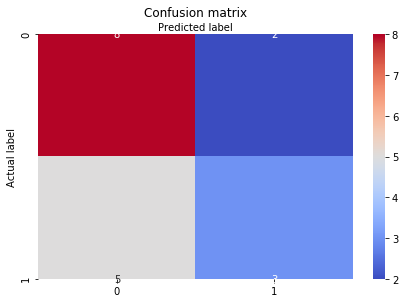

In [135]:
class_names = ['No', 'Yes'] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(c_matrix), annot = True, cmap = 'coolwarm', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Let's have a more reliable value of scores using the K-Fold technique

In [138]:
from sklearn.model_selection import KFold

In [144]:
def train_knn_kfold(number_folds):
    scores = []
    kfold = KFold(n_splits = number_folds, shuffle = False, random_state = 0)
    knn_model = KNeighborsClassifier(n_neighbors = 3)
    for train_index, test_index in kfold.split(X_Gyms_refactored_scaled):
        X_train, X_test, y_train, y_test = X_Gyms_refactored_scaled[train_index], X_Gyms_refactored_scaled[test_index], Y_Gyms.values[train_index], Y_Gyms.values[test_index]
        knn_model.fit(X_train, y_train)
        scores.append(knn_model.score(X_test, y_test))
    print('K-Nearest Neighbor with {} folds -> score: {}'.format(number_folds, np.mean(scores)))

In [147]:
train_knn_kfold(2)
train_knn_kfold(3)
train_knn_kfold(4)
train_knn_kfold(5)
train_knn_kfold(6)
train_knn_kfold(8)

K-Nearest Neighbor with 2 folds -> score: 0.5769841269841269
K-Nearest Neighbor with 3 folds -> score: 0.4939613526570048
K-Nearest Neighbor with 4 folds -> score: 0.4934640522875817
K-Nearest Neighbor with 5 folds -> score: 0.5342857142857144
K-Nearest Neighbor with 6 folds -> score: 0.5631313131313131
K-Nearest Neighbor with 8 folds -> score: 0.5503472222222222


### As expirience says, for small datasets like ours, a small number of splits performes better.

# 7) Using the model

## Applying our model to the Bari business candidates

### Training on all the dataset

In [148]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
# Train the model using the all the dataset
knn_model.fit(X_Gyms_refactored_scaled, Y_Gyms.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Installing joblib to save the model

In [11]:
!conda install -c conda-forge joblib --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - joblib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.13.2              |             py_0         180 KB  conda-forge

The following NEW packages will be INSTALLED:

    joblib: 0.13.2-py_0 conda-forge


joblib-0.13.2        | 180 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [12]:
from joblib import dump, load

In [13]:
#saving the model
#dump(knn_model, 'models_final/knn.joblib') 
knn_model = load('models_final/knn.joblib') 

### Prediction

In [18]:
Y_Bari = pd.DataFrame(knn_model.predict(X_Bari_refactored), columns = ['Suitable'])

In [19]:
Y_Bari

,Suitable
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,No
8,No
9,No


In [21]:
#Y_Bari.to_csv(path_or_buf = 'csv_final/ds_Y_Barid.csv', index = False, header = True)

# 8) Results

## Looking at the results of the prediction using the barchart

In [6]:
#Y_Bari = pd.read_csv('csv_final/ds_Y_Barid.csv')

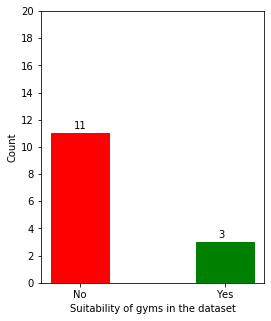

In [27]:
barchartSustainable(Y_Bari)

### Merging back the name of the Candidates with the results to a new dataframe

In [34]:
df_Bari_res = pd.concat([bari_grouped['Candidate name'], Y_Bari['Suitable']], axis = 1).reset_index()

### Merging back the also coordinates

In [46]:
df_bari_business_candidates_renamed = df_bari_business_candidates.rename(columns = {"label": "Candidate name"})
df_Bari_res_final = pd.merge(df_bari_business_candidates_renamed, df_Bari_res, on = 'Candidate name')
df_Bari_res_final.drop(columns = ['index'], inplace = True)

In [25]:
#df_Bari_res_final.to_csv(path_or_buf = 'csv_final/df_Bari_res_final.csv', index = False, header = True)
df_Bari_res_final = pd.read_csv('csv_final/df_Bari_res_final.csv')

In [48]:
df_Bari_res_final

,Candidate name,lat,lng,Suitable
0,Candidate 1,41.107490,16.858164,No
1,Candidate 2,41.121638,16.863280,No
2,Candidate 3,41.126345,16.850346,No
3,Candidate 4,41.110440,16.875220,No
4,Candidate 5,41.117143,16.871871,No
5,Candidate 6,41.125244,16.867739,No
6,Candidate 7,41.102368,16.883432,No
7,Candidate 8,41.121354,16.859204,No
8,Candidate 9,41.124513,16.860660,No
9,Candidate 10,41.114412,16.852271,Yes


#### Unfortunately foilum at the moment doesn't support the deleting and editing of markers so we need to build the map again, showing only the marker where Suitable is 'Yes'

In [26]:
# Use geopy library to get the latitude and longitude values of Bari.
address = 'Bari, Italy'
geolocator = Nominatim(user_agent="bari_explorer")
location_bari = geolocator.geocode(address)
latitude_bari = location_bari.latitude
longitude_bari = location_bari.longitude


map_bari = folium.Map(location = [latitude_bari, longitude_bari], zoom_start = 13)

boroughs_overlay = f'Bari_borough.geojson'
folium.GeoJson(
    boroughs_overlay,
    name = 'geojson'
).add_to(map_bari)

# Adds markers to map
for Bari_res_final in df_Bari_res_final.iterrows():
    if(Bari_res_final[1]['Suitable'] == 'Yes'):
        lat = Bari_res_final[1]['lat']
        lng = Bari_res_final[1]['lng']
        label = Bari_res_final[1]['Candidate name']
        label = folium.Popup(label, parse_html = True)
        folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup = label,
            color = 'blue',
            fill = True,
            fill_color = '#3186cc',
            fill_opacity = 0.7,
            parse_html = False).add_to(map_bari) 
    
# Loading the neighbourhoods
ds_neighbourhoods_data = pd.read_csv('csv_final/ds_neighbourhoods_data.csv')

for neighbourhood_data in ds_neighbourhoods_data.iterrows():
    lat = float(neighbourhood_data[1]['lat'])
    lng = float(neighbourhood_data[1]['lng'])
    label = '{}: {}'.format('Name', neighbourhood_data[1]['label'])
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 4,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_bari) 

In [27]:
map_bari

## Let's discriminate which neighbourhood the points found are part of

### Using a function to calcolate the distance between points, using the coordinates

In [93]:
def haversine(lat1, lng1, lat2, lng2):
    R = 6372800  # Earth radius in meters
    
    lat1 = float(lat1)
    lng1 = float(lng1)
    
    lat2 = float(lat2)
    lng2 = float(lng2)
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lng2 - lng1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

def findNeighbourhood(name_business, lat_business, lng_business):
    neighbourhood_target = ''
    shortest_distance = 6372800 #initialize to the heart radius (in meters)
    for neighbourhood_data in ds_neighbourhoods_data.iterrows():
        name = neighbourhood_data[1]['label']
        lat = neighbourhood_data[1]['lat']
        lng = neighbourhood_data[1]['lng']
        dist = haversine(lat_business, lng_business, lat, lng)
        if(dist < shortest_distance):
            shortest_distance = dist
            neighbourhood_target = name
    return {'candidate_name' : name_business, 'neighbourhood_target' : neighbourhood_target, 'distance' : shortest_distance}       

In [94]:
neighbourhood_position = []

for Bari_res_final in df_Bari_res_final.iterrows():
    if(Bari_res_final[1]['Suitable'] == 'Yes'):
        neighbourhood_position.append(findNeighbourhood(Bari_res_final[1]['Candidate name'], Bari_res_final[1]['lat'], Bari_res_final[1]['lng']))

In [95]:
neighbourhood_position

[{'candidate_name': 'Candidate 10',
  'neighbourhood_target': 'Picone (Bari)',
  'distance': 800.5893487127549},
 {'candidate_name': 'Candidate 13',
  'neighbourhood_target': 'Stanic-Villaggio del Lavoratore',
  'distance': 790.2205645485354},
 {'candidate_name': 'Candidate 14',
  'neighbourhood_target': 'Marconi-San Girolamo-Fesca',
  'distance': 1939.8965928756404}]

### Watching at the general distribution of points in all the neighbourhoods

In [149]:
# Initializing the number column to zeroes
distribution_in_neighbourhood = pd.DataFrame(0, index = np.arange(len(ds_neighbourhoods_data)), columns = ['label', 'number'])

# Assigning the labels
distribution_in_neighbourhood['label'] = ds_neighbourhoods_data['label']

for neighbourhood_current_position in neighbourhood_position:
    if neighbourhood_current_position['neighbourhood_target'] in distribution_in_neighbourhood['label'].values:
        index = np.where(distribution_in_neighbourhood['label'].values == neighbourhood_current_position['neighbourhood_target'])[0]
        num = distribution_in_neighbourhood.loc[distribution_in_neighbourhood['label'] == neighbourhood_current_position['neighbourhood_target']]['number']
        num = num + 1
        distribution_in_neighbourhood.at[index, 'number'] = num

#### Making an horizontal bar chart

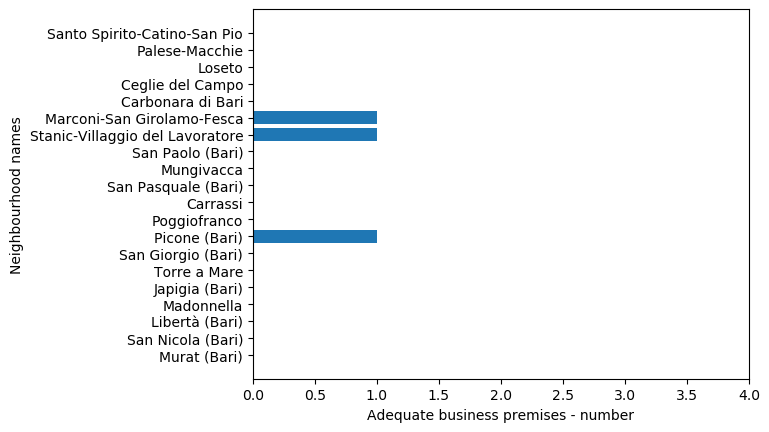

In [159]:

plt.rcdefaults()
fig, ax = plt.subplots()
Y_neigh = distribution_in_neighbourhood['number']
X_neigh = distribution_in_neighbourhood['label']
Y_pos = np.arange(len(X_neigh))
# Create horizontal bars
plt.barh(Y_pos, Y_neigh)
# Create names on the y-axis
plt.yticks(Y_pos, X_neigh)
ax.set_xlim([0, 4])
ax.set_ylabel("Neighbourhood names")
ax.set_xlabel("Adequate business premises - number")
# Show plot
plt.show()

# 9) Conclusions

In this small datascience research, three neighbourhoods which won "the battle" of having a probable business premise for a gym in the city of Bari, Italy are "Marconi-San Girolamo-Fesca", "Stanic-Villaggio del Lavoratore" and "Picone".
In absence of other known factors, this small model can give a hand in choosing the right place for a cold-start business.

# 10) Limitations

* The first and most important limitation is the assumption that the rating of a gym can be discriminated only by the surrounding businesses. That is of course not true but this assumption can be taken in account for future development as a subset of feature to analyze.
* The whole research of venues is limited by the Foursquare API number of calls per day, therefore the LIMIT parameter of venues around each gym has been limited to 100 entries.
* The parameter RADIUS used for the search of venues is set to 250 meters, this is considered the maximum limit of distance in which a person is willing to walk before or after the gym session. No information in the social sciences literature has been found about it.
* The cities to train with have population between 180000 and 420000 units: this choice has been made looking at the calls limit in Foursquare API and because the model wanted to take in account the behavior of an average city inhabitant in Italy.
* The threshold rating imposed to 7.0 is the result of average quality perception of a point of interest. 
* The host used to search for free location in Bari is casa.it, which data are scrapped from a single webpage. An extensive system should be able to use API calls or at least being able to scrap multiple websites being aware that the possible clones of announces should be deleted in the phase of data preparation.
* The boroughs of Bari are following the old grouping system: that's because the new one (with "Municipi") tends to group too many neighbourhoods together, making the differentiation of zones too much simplistic.

# 11) Future development

* Having clues about the weights related to importance to having or not certain categories of venues/POI around the business tarrget.
* Toughen the model finding references about the best ranked gyms (or any another business) monthly price (and making relation to the average salary of the area), available courses, opening time, surface dimension and affluence (maybe trying to get the latter from some Google API).
* Adding some area parameters such as ease of finding parking, general traffic at opening time, perceived surroundings security.


# References

* Hu, Longke & Sun, Aixin & Liu, Yong. (2014). Your neighbors affect your ratings: on geographical neighborhood influence to rating prediction. 10.1145/2600428.2609593.
* Froehlich, J., Chen, M.Y., Smith, I.E., & Potter, F. (2006). Voting with Your Feet: An Investigative Study of the Relationship Between Place Visit Behavior and Preference. UbiComp.
